<br>

<br>

<br>

# 👾 **SPAM LINK DETECTION SYSTEM** 👾

**NATURAL LANGUAGE PROCESSING**

<br>

## **INDEX**

- **STEP 1: PROBLEM DEFINITION AND DATA COLLECTION**
- **STEP 2: DATA EXPLORATION AND CLEANING**
- **STEP 3: DATA PROCESSING**
- **STEP 4: MODEL DEVELOPMENT: SUPPORT VECTOR MACHINE (SVM)**
- **STEP 5: MODEL OPTIMIZATION**
- **STEP 6: MODEL DEPLOYMENT AND SAVING**
- **STEP 7: CONCLUSION**

<br>

## **STEP 1: PROBLEM DEFINITION AND DATA COLLECTION**

- 1.1. Define the problem
- 1.2. Library Importing
- 1.3. Data Collection

**1.1. PROBLEM DEFINITION**

The increasing volume of web pages created daily has brought a proportional rise in spam and malicious URLs. These URLs often pose threats like phishing, malware, and other forms of cyber-attacks. The goal of this project is to create a **Spam Link Detection System** that can identify whether a URL is spam or legitimate based on its structure. By analyzing the patterns within URLs, we aim to automate this detection process, reducing the need for manual review and improving online security.

<br>

**What is Natural Language Processing (NLP)?**
**Natural Language Processing (NLP)** is a branch of Artificial Intelligence (AI) that focuses on the interaction between computers and human language. **NLP** techniques enable machines to read, understand, and derive meaning from text data. 

In this project, URLs are treated as a form of text data, allowing us to leverage NLP techniques like tokenization, stopword removal, and lemmatization to preprocess and extract meaningful patterns from them.

<br>

**Data Processing**

In relation to this project, **data processing** involves transforming raw URLs into a format suitable for machine learning models. This includes:
- **Tokenization:** Breaking URLs into smaller components based on punctuation or special characters.  
- **Stopword Removal:** Eliminating common yet uninformative words like "www" or "http."  
- **Lemmatization/Stemming:** Reducing words to their base or root forms.  

These steps help highlight the key elements of URLs that are indicative of spam, ensuring that our model focuses on the most relevant features.

<br>

**Methodology: SUPPORT VECTOR MACHINE (SVM)**

The **Support Vector Machine (SVM)** is a supervised learning algorithm widely used for classification problems. SVM works by finding the hyperplane that best separates data points into different classes. For this project:
- We will use an **initial SVM model** with default parameters to classify URLs as spam or legitimate.  
- **Hyperparameter optimization** will follow, refining the model for improved performance.  
- The final model will be saved and deployed for real-world application, enabling automated spam detection.


<br>

**1.2. LIBRARY IMPORTING**

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib
import os 
import re  # For working with regular expressions (e.g., to split URLs)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

nltk.download('stopwords')
nltk.download('wordnet')
#nltk.download('punkt') hemos optado por "re" para la tokenización.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<br>

**1.3. DATA COLLECTION** 

Load a dataset from a given URL and validate its structure.
    
**Parameters:**
- `url (str)`: The URL to the CSV dataset.
- ` required_columns (list)`: List of required column names (optional).
    
**Returns:**
- pd.DataFrame or None: The loaded dataset if successful, otherwise None.

In [3]:

def load_dataset(url, required_columns=None):

    try:
        # Load the dataset from the URL
        data = pd.read_csv(url)

        # Display an initial summary of the dataset
        print("Dataset loaded successfully.")
        print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.\n")
        print("First 5 rows of the dataset:")
        print(data.head())

        # Check for required columns if specified
        if required_columns:
            missing_columns = [col for col in required_columns if col not in data.columns]
            if missing_columns:
                print(f"Error: The dataset is missing the following required columns: {missing_columns}")
                return None
        
        # Display missing values summary
        print("\nMissing values summary:")
        print(data.isnull().sum())
        
        return data

    except Exception as e:
        # Handle any errors that occur during loading
        print(f"An error occurred while loading the dataset: {e}")
        return None

# Dataset URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv"

# Function call with validation for 'url' and 'is_spam' columns
required_columns = ['url', 'is_spam']
dataset = load_dataset(url, required_columns)

# Additional verification
if dataset is not None:
    print("\nDataset columns:")
    print(dataset.columns)


Dataset loaded successfully.
The dataset has 2999 rows and 2 columns.

First 5 rows of the dataset:
                                                 url  is_spam
0  https://briefingday.us8.list-manage.com/unsubs...     True
1                             https://www.hvper.com/     True
2                 https://briefingday.com/m/v4n3i4f3     True
3   https://briefingday.com/n/20200618/m#commentform    False
4                        https://briefingday.com/fan     True

Missing values summary:
url        0
is_spam    0
dtype: int64

Dataset columns:
Index(['url', 'is_spam'], dtype='object')


<br>

## **STEP 2: DATA EXPLORATION AND CLEANING**

- 2.1. Exploration
- 2.2. Eliminating Duplicates
- 2.3. Class Distribution
- 2.4. Save Cleaned Dataset


<br>

**2.1. EXPLORATION**

In [4]:
# Basic exploration of the dataset
print("Dataset overview:")
print(dataset.info())  # Column names, data types, and non-null counts

print("\nSummary statistics for numerical columns:")
print(dataset.describe())  # Quick statistics for any numerical data

print("\nChecking for null values:")
print(dataset.isnull().sum())  # Detect any missing values

print("\nFirst 5 rows of the dataset:")
print(dataset.head())


Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2999 non-null   object
 1   is_spam  2999 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 26.5+ KB
None

Summary statistics for numerical columns:
                                         url is_spam
count                                   2999    2999
unique                                  2369       2
top     https://www.bloomberg.com/tosv2.html   False
freq                                      26    2303

Checking for null values:
url        0
is_spam    0
dtype: int64

First 5 rows of the dataset:
                                                 url  is_spam
0  https://briefingday.us8.list-manage.com/unsubs...     True
1                             https://www.hvper.com/     True
2                 https://briefingday.com/m/v4n3i4f3     True
3   https://briefingd

**OBSERVATIONS:**

**Columns of the dataset:**  
- **url** → data type: object (text).  
- **is_spam** → data type: bool (True/False).  

**Null values:**  
There are no null values in any column.  

**Duplicates:**  
There are **2369 unique values** in the **url** column, while the total number of rows is **2999**, which suggests that duplicates exist.  

**Target distribution (is_spam):**  
- **False** (Not spam): 2303 records.  
- **True** (Spam): 696 records.  

<br>

**2.2. ELIMINATING DUPLICATES**

In [6]:
# Check for duplicate URLs
print(f"Number of duplicate URLs: {dataset.duplicated(subset=['url']).sum()}")

# Drop duplicate URLs and keep the first occurrence
dataset_cleaned = dataset.drop_duplicates(subset=['url'], keep='first')

print(f"Dataset size after removing duplicates: {dataset_cleaned.shape[0]} rows")


Number of duplicate URLs: 630
Dataset size after removing duplicates: 2369 rows


<br>

**2.3. CLASS DISTRIBUTION**

Class distribution of 'is_spam':
is_spam
False    2125
True      244
Name: count, dtype: int64


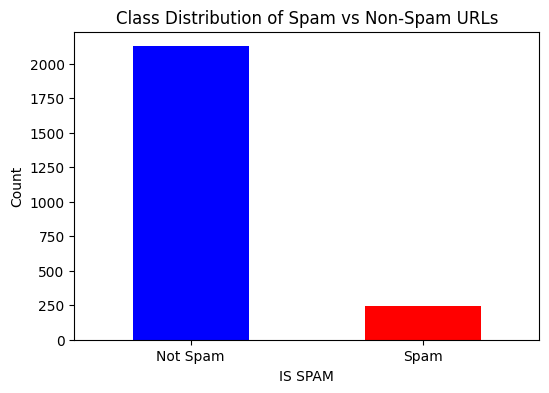

In [10]:
# Class distribution for 'is_spam'
print("Class distribution of 'is_spam':")
print(dataset_cleaned['is_spam'].value_counts())

# Visualize class distribution

plt.figure(figsize=(6, 4))
dataset_cleaned['is_spam'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Class Distribution of Spam vs Non-Spam URLs")
plt.xlabel("IS SPAM")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Not Spam', 'Spam'], rotation=0)
plt.show()

<br>

**2.4. SAVE CLEANED DATASET**

In [11]:
# Save the cleaned dataset
dataset_cleaned.to_csv("cleaned_url_spam.csv", index=False)
print("Cleaned dataset saved as 'cleaned_url_spam.csv'.")


Cleaned dataset saved as 'cleaned_url_spam.csv'.


<br>

## **STEP 3: DATA PROCESSING**

- 3.1. Tokenization and Stopword Removal
- 3.2. Lemmatization
- 3.3. Convert Text to Numerical Features.

<br>

In this step, we will prepare the URLs for the machine learning model by transforming them into a format that the model can understand. Since URLs are text-based data, we need to extract meaningful features by breaking them into tokens. Specifically, we will:

 1) **Tokenize** the URLs using punctuation marks as delimiters.
 2) **Remove irrelevant words** such as common stopwords (e.g., "www", "http").
 3) **Normalize the text** using lemmatization to reduce words to their base forms.
 4) Convert the processed text into **numerical features** using **`TfidfVectorizer`**, which is suitable for text-based data.

<br>

**3.1. TOKENIZATION AND STOPWORD REMOVAL**

Preprocesses a URL by tokenizing it using punctuation as delimiters and removing stopwords.

In [17]:

# Define stopwords
stop_words = set(stopwords.words('english'))

def preprocess_url(url):

    # Tokenize the URL using punctuation marks as delimiters
    tokens = re.split(r'[/.?=&-]', url)
    
    # Remove empty strings and stopwords
    tokens = [t.lower() for t in tokens if t and t.lower() not in stop_words]
    
    return " ".join(tokens)

# Create an explicit copy of the cleaned dataset
dataset_cleaned = dataset_cleaned.copy()

# Apply the preprocessing function to the 'url' column
dataset_cleaned['processed_url'] = dataset_cleaned['url'].apply(preprocess_url)

# Display the first 5 processed URLs
print("Processed URLs:")
print(dataset_cleaned[['url', 'processed_url']].head())


Processed URLs:
                                                 url  \
0  https://briefingday.us8.list-manage.com/unsubs...   
1                             https://www.hvper.com/   
2                 https://briefingday.com/m/v4n3i4f3   
3   https://briefingday.com/n/20200618/m#commentform   
4                        https://briefingday.com/fan   

                                       processed_url  
0  https: briefingday us8 list manage com unsubsc...  
1                               https: www hvper com  
2                    https: briefingday com v4n3i4f3  
3    https: briefingday com n 20200618 m#commentform  
4                         https: briefingday com fan  


<br>

**3.2. LEMMATIZATION**

 Lemmatizes each word in the given text.

In [18]:
def lemmatize_text(text):

    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# Ensure dataset_cleaned is a copy of the original DataFrame
dataset_cleaned = dataset_cleaned.copy()

# Apply Lemmatization to the processed URLs using .loc to avoid warnings
dataset_cleaned.loc[:, 'processed_url'] = dataset_cleaned['processed_url'].apply(lemmatize_text)

# Display the Lemmatized URLs
print("Lemmatized URLs:")
print(dataset_cleaned[['url', 'processed_url']].head())


Lemmatized URLs:
                                                 url  \
0  https://briefingday.us8.list-manage.com/unsubs...   
1                             https://www.hvper.com/   
2                 https://briefingday.com/m/v4n3i4f3   
3   https://briefingday.com/n/20200618/m#commentform   
4                        https://briefingday.com/fan   

                                       processed_url  
0  https: briefingday us8 list manage com unsubsc...  
1                               https: www hvper com  
2                    https: briefingday com v4n3i4f3  
3    https: briefingday com n 20200618 m#commentform  
4                         https: briefingday com fan  


**3.3. CONVERT TEXT TO NUMERICAL FEATURES**

Converting URLs to Numerical Features with  **`TfidfVectorizer`**

In [14]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency

# Fit and transform the processed URLs into numerical features
X = vectorizer.fit_transform(dataset_cleaned['processed_url'])

# Target variable
y = dataset_cleaned['is_spam']

print(f"Feature matrix shape: {X.shape}")
print("Sample feature names:", vectorizer.get_feature_names_out()[:10])

Feature matrix shape: (2369, 5000)
Sample feature names: ['01' '01838' '01864' '01891' '01906' '01908' '02' '020' '02cd1f7a8c70'
 '03']


<br>

## **STEP 4: MODEL DEVELOPMENT: SUPPORT VECTOR MACHINE (SVM)**

- 4.1. Train the Initial SVM Model
- 4.2. Evaluate the SVM Model

<br>

In this step, we will focus on building and training a Support Vector Machine (SVM) model to classify URLs as spam or not spam.

The process involves:

- **Defining the SVM model**: We will start with the default hyperparameters to establish a baseline performance.
- **Training the model**: Use the training dataset to train the SVM classifier.
- **Evaluating the model**: Assess the model's performance on the test dataset using accuracy, confusion matrix, and classification report.

<br>

**4.1. TRAIN THE INITIAL `SVM MODEL`**

In [15]:
# Initialize the Support Vector Machine classifier with default parameters
svm_model = SVC()

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
print("Training the SVM model...")
svm_model.fit(X_train, y_train)

print("Model training completed!")

Training the SVM model...
Model training completed!


<br>

**4.2. EVALUATE THE `SVM MODEL`**

In [16]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the SVM model: 0.96

Classification Report:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       435
        True       0.91      0.54      0.68        39

    accuracy                           0.96       474
   macro avg       0.94      0.77      0.83       474
weighted avg       0.96      0.96      0.95       474

